In [14]:
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize

In [15]:
text = 'In brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America'

token = word_tokenize(text)
token

['In',
 'brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [16]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [17]:
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)
fdist1


[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

<Axes: xlabel='Key'>

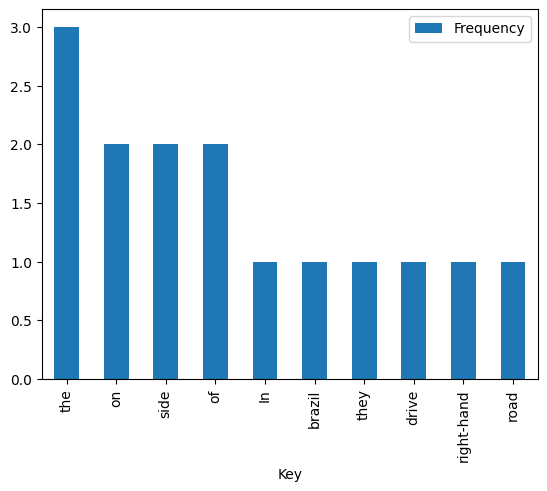

In [18]:
df_freq_tokens = pd.DataFrame(fdist1,columns=['Key','Frequency'])
df_freq_tokens.set_index('Key',inplace=True)

df_freq_tokens.plot(kind='bar')

In [19]:
from nltk import word_tokenize
from nltk.corpus import stopwords

a = set(stopwords.words('english'))
text = 'Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal'

text1 = word_tokenize(text.lower())

text1

stopwords = [x for x in text1 if x not in a]
stopwords

['cristiano',
 'ronaldo',
 'born',
 'february',
 '5',
 ',',
 '1985',
 ',',
 'funchal',
 ',',
 'madeira',
 ',',
 'portugal']

In [20]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = 'presumably I would like to Multiply my provision, saying tHat without crYing'
S

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster','Porter','Snowball']
for stemmer_name,stem in zip(names,stemmer_list):
    if stemmer_name == 'Snowball':
        st = stem('english')
    else:
        st = stem()
    print(stemmer_name,': ',' '.join(st.stem(s) for s in S.split()))

Lancaster :  presum i would lik to multiply my provision, say that without cry
Porter :  presum i would like to multipli my provision, say that without cri
Snowball :  presum i would like to multipli my provision, say that without cri


In [21]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print('rocks : ',lemmatizer.lemmatize('rocks'))
print('corpora : ',lemmatizer.lemmatize('corpora'))

rocks :  rock
corpora :  corpus


[nltk_data] Downloading package wordnet to C:\Users\Adi
[nltk_data]     Karunia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Adi
[nltk_data]     Karunia\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
# Bagian 1: Pra-pemrosesan Data
import pickle
import os
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Mengunduh paket NLTK yang diperlukan (jika belum ada)
try:
    stopwords.words('english')
except LookupError:
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')

stop_words = set(stopwords.words('english'))

# Ganti 'nama_folder_data' dengan path folder tempat file .pkl Anda berada
# Contoh: src_name = "20newsgroups.pkl"
src_name = r"C:\Users\Adi Karunia\Downloads\4 ME\UNAIR\MATKUL\SMT 5\DATMIN\PRAKTIKUM\TM 4\20newsgroup.pckl"
src_path = os.path.join("data", src_name) 

# Memuat data (pastikan file '20newsgroups.pkl' ada di dalam folder 'data')
# Jika file tidak ada, kode ini akan error.
# Untuk tujuan demonstrasi, kita akan membuat data dummy jika file tidak ditemukan.
try:
    with open(src_path, 'rb') as fin:
        data = pickle.load(fin)
    docs = [doc for doc in data.data]
    label = data.target
except FileNotFoundError:
    print(f"Peringatan: File '{src_path}' tidak ditemukan. Menggunakan data contoh.")
    # Data contoh jika file asli tidak ada
    '''docs = [
        "The quick brown fox jumps over the lazy dog.",
        "A fast-moving brown fox leaps over a sleepy dog.",
        "The new movie is awesome, a great film.",
        "I love this new film, it is fantastic.",
        "What is the price of this computer hardware?",
        "Computer software and hardware prices are dropping."
    ]'''

def preprocess(doc):
    """
    Fungsi untuk membersihkan teks:
    1. Tokenisasi kata
    2. Hapus stopwords
    3. Ubah ke huruf kecil (case folding)
    4. Hapus karakter non-alfanumerik
    5. Hapus spasi berlebih
    """
    # Tokenisasi menjadi kata-kata
    words = word_tokenize(doc)
    
    # Menghapus stop words (kata umum seperti 'the', 'a', 'in')
    words = [t for t in words if t.lower() not in stop_words]

    sents_tok = []
    for s in words:
        s = s.strip().lower() # Case folding dan menghilangkan spasi di awal/akhir
        s = s.replace("\n", " ") # Menggantikan newline dengan spasi
        s = re.sub("[^a-zA-Z0-9]", " ", s) # Menghapus simbol (selain huruf dan angka)
        s = re.sub("\s+", " ", s) # Menghapus spasi berlebih
        if s.strip(): # Memastikan kata tidak kosong setelah dibersihkan
            sents_tok.append(s.strip())
            
    return " ".join(sents_tok)

docs_clear = []
for d in docs:
    docs_clear.append(preprocess(d))


In [23]:
docs

['I want to get a car alarm and I am thinking about getting an Ungo Box.\n    Does anyone out there have any knowledge or experience with any of\n    these alarms?  How about price ranges for the different models?\n    Are these good car alarms?  Please email me any responces.\n\n                cak3@ns3.lehigh.edu',
 'I did hear this question asked during a radio news update of the case.  (They\nwere talking about the ongoing trial and had some audio clips).  Immediately\nafter the defense attorney asked the question, there was an "Objection!" heard\nin the background.  The clip ended at that point so I don\'t know if the\nobjection was upheld.  I can\'t imagine NC is *that* bad. \n\nThis I didn\'t hear as an audio clip but heard it reported a number of times on\nnews stories both during and after the trial.  Now the "we did it on purpose"\nthing is stretching, I think it was something more like--he had it coming.  If\nsomebody else remebers better than I on this second point, feel fr

In [24]:
docs_clear

['want get car alarm thinking getting ungo box anyone knowledge experience alarms price ranges different models good car alarms please email responces cak3 ns3 lehigh edu',
 'hear question asked radio news update case talking ongoing trial audio clips immediately defense attorney asked question objection heard background clip ended point n t know objection upheld ca n t imagine nc bad n t hear audio clip heard reported number times news stories trial purpose thing stretching think something like coming somebody else remebers better second point feel free clarify frank frank r chloupek chloupek ohstpy mps ohio state edu department physics ohio state university ohio state university',
 'quoting jeffrey j nucciarone s nucci microwave gsfc nasa gov article c4g8hv cs4 skates gsfc nasa gov 04 06 93 pertinent part jj considering buying used 90 taurus sho car jj question 37k miles took test drive day jj questions came jj jj jj second anything specifically look jj sho vintage anything specifica

In [25]:
# Bagian 2: Representasi Vektor dan Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Membuat representasi vektor TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)

# Menampilkan dimensi dari matriks TF-IDF
print("Dimensi Matriks TF-IDF (dokumen, fitur):", X.shape)
print("-" * 20)

# Melakukan clustering dengan K-Means
k = 3
seed = 99 # Nilai seed untuk Random generator, agar hasil selalu sama
kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=seed, n_init=10) # n_init=10 ditambahkan untuk menghindari warning
kmeans.fit(X)

# Memprediksi hasil clusteringnya
C = kmeans.predict(X)
C_km = C

# Menampilkan hasil cluster untuk 10 dokumen pertama
print("Hasil Cluster (10 dokumen pertama):")
print(C_km[:10])

Dimensi Matriks TF-IDF (dokumen, fitur): (1653, 10638)
--------------------
Hasil Cluster (10 dokumen pertama):
[2 0 2 0 0 0 0 2 0 0]


In [26]:
# (Bagian 1: Pra-pemrosesan Data - SAMA SEPERTI SEBELUMNYA)
# ... (kode impor, pemuatan data, dan fungsi preprocess tidak berubah)
# ... docs_clear = [] ...
# ... print('DONE!')

# Bagian 2: Representasi Vektor dan Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Membuat representasi vektor TF-IDF (Sama seperti sebelumnya)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print("Dimensi Matriks TF-IDF (dokumen, fitur):", X.shape)
print("-" * 20)

# --- BAGIAN YANG DIPERBARUI ---
# Melakukan clustering dengan K-Means++
k = 3
seed = 99

# Menggunakan inisialisasi 'k-means++'
kmPP = KMeans(n_clusters=k, 
              init='k-means++',  # Perbedaan utama ada di sini
              max_iter=300, 
              tol=0.0001, 
              random_state=seed,
              n_init=10)
kmPP.fit(X)

C_kmpp = kmPP.predict(X)

# Menampilkan hasil cluster untuk 10 dokumen pertama
print("Hasil Cluster K-Means++ (10 dokumen pertama):")
print(C_kmpp[:10])

Dimensi Matriks TF-IDF (dokumen, fitur): (1653, 10638)
--------------------
Hasil Cluster K-Means++ (10 dokumen pertama):
[0 2 0 2 2 0 2 0 2 2]


In [27]:
# (Bagian 1: Pra-pemrosesan Data - SAMA SEPERTI SEBELUMNYA)
# ... (kode impor, pemuatan data, dan fungsi preprocess tidak berubah)
# ... docs_clear = [] ...
# ... print('DONE!')

# Bagian 2: Representasi Vektor (Sama seperti sebelumnya)
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat representasi vektor TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print("Dimensi Matriks TF-IDF (dokumen, fitur):", X.shape)
print("-" * 20)

# --- BAGIAN YANG DIPERBARUI ---
# Melakukan clustering dengan DBSCAN
import numpy as np
from sklearn.cluster import DBSCAN

# 'eps' adalah parameter kunci di DBSCAN
# Menentukan jarak maksimum antara dua sampel agar dianggap bertetangga.
# Nilai ini sangat sensitif dan mungkin perlu penyesuaian (tuning).
dbscan = DBSCAN(eps=0.5) 
dbscan.fit(X)

# Mengambil label cluster
# Label -1 berarti 'noise' atau outlier
C_db = dbscan.labels_.astype(int)

# Menampilkan hasil cluster untuk 10 dokumen pertama
print("Hasil Cluster DBSCAN (10 dokumen pertama):")
print(C_db[:10])

Dimensi Matriks TF-IDF (dokumen, fitur): (1653, 10638)
--------------------
Hasil Cluster DBSCAN (10 dokumen pertama):
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [28]:
from sklearn.metrics import silhouette_score as siluet 
C = [C_km,C_kmpp,C_db]

for res in C:
    print(siluet(X,res),end=' ')

0.01749567738259666 0.01705048548622145 -0.23765091937418498 

In [29]:
from sklearn.metrics.cluster import homogeneity_score as purity 

for res in C:
    print(purity(label,res),end=' ')

0.21449949765714296 0.29225848127121545 0.0015549989772357536 

In [30]:
from sklearn.metrics import normalized_mutual_info_score as NMI 

for res in C:
    print(NMI(label,res),end=' ')

0.2738040819562823 0.35647839936176845 0.002704356633566744 